In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

##EDA

##Importing the data

In [36]:
data = 'https://github.com/ovlasenko-ellation/capstone_2_BTC/raw/main/Data_input/BTC-USD_daily.csv'

In [37]:
btc = pd.read_csv(data)
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


##Preparing dataset

In [38]:
btc.columns = btc.columns.str.lower().str.replace(' ', '_')
btc

,date,open,high,low,close,adj_close,volume
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566
...,...,...,...,...,...,...,...
360,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
361,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
362,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
363,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945


Checking for missing vaalues

In [39]:
btc.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [40]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       365 non-null    object 
 1   open       365 non-null    float64
 2   high       365 non-null    float64
 3   low        365 non-null    float64
 4   close      365 non-null    float64
 5   adj_close  365 non-null    float64
 6   volume     365 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


Checking unique values

In [41]:
btc.nunique()

date         365
open         365
high         365
low          364
close        365
adj_close    365
volume       365
dtype: int64

In [42]:
btc.agg(['min', 'mean', 'max'])

<ipython-input-42-721eed28628a>:1: FutureWarning: ['date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  btc.agg(['min', 'mean', 'max'])


,date,open,high,low,close,adj_close,volume
min,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,5.331173e+09
mean,NaN,28788.795848,29266.231914,28390.678382,28859.448250,28859.448250,1.825093e+10
max,2023-12-31,44180.019531,44705.515625,43627.597656,44166.601563,44166.601563,5.462223e+10


In [43]:
for col in btc.columns:
    print(col)
    print(btc[col].unique()[:5])
    print(btc[col].nunique())
    print()

date
['2023-01-01' '2023-01-02' '2023-01-03' '2023-01-04' '2023-01-05']
365

open
[16547.914063 16625.509766 16688.847656 16680.205078 16863.472656]
365

high
[16630.439453 16759.34375  16760.447266 16964.585938 16884.021484]
365

low
[16521.234375 16572.228516 16622.371094 16667.763672 16790.283203]
364

close
[16625.080078 16688.470703 16679.857422 16863.238281 16836.736328]
365

adj_close
[16625.080078 16688.470703 16679.857422 16863.238281 16836.736328]
365

volume
[ 9244361700 12097775227 13903079207 18421743322 13692758566]
365



##Analyzing the distribution of values

<Axes: xlabel='volume', ylabel='Count'>

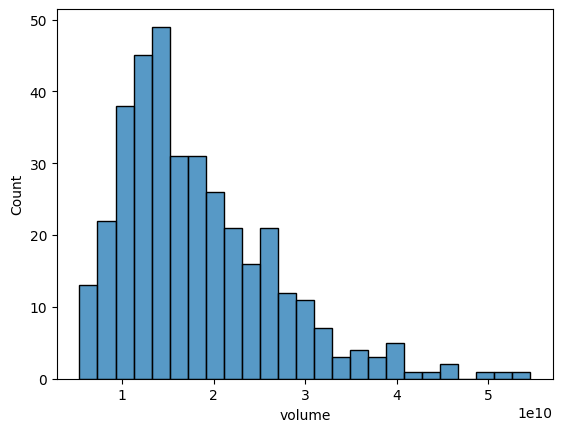

In [44]:
sns.histplot(btc.volume, bins=25)

<Axes: xlabel='adj_close', ylabel='Count'>

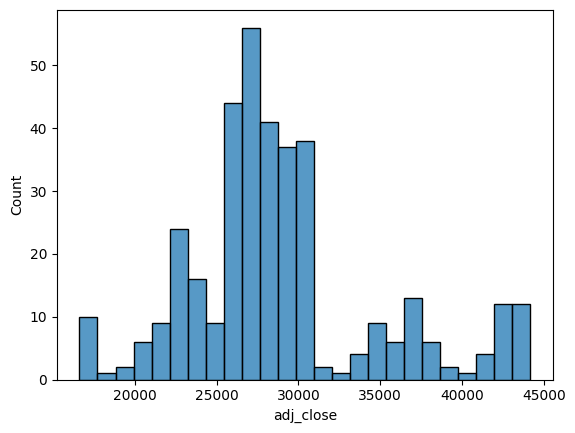

In [45]:
sns.histplot(btc.adj_close, bins=25)

In [46]:
date = []
for d in btc['date']:
    if d.split('-')[0] in date:
        date.append('')
    else:
        date.append(d.split('-')[0])

Text(0.5, 1.0, 'Bitcoin Trends')

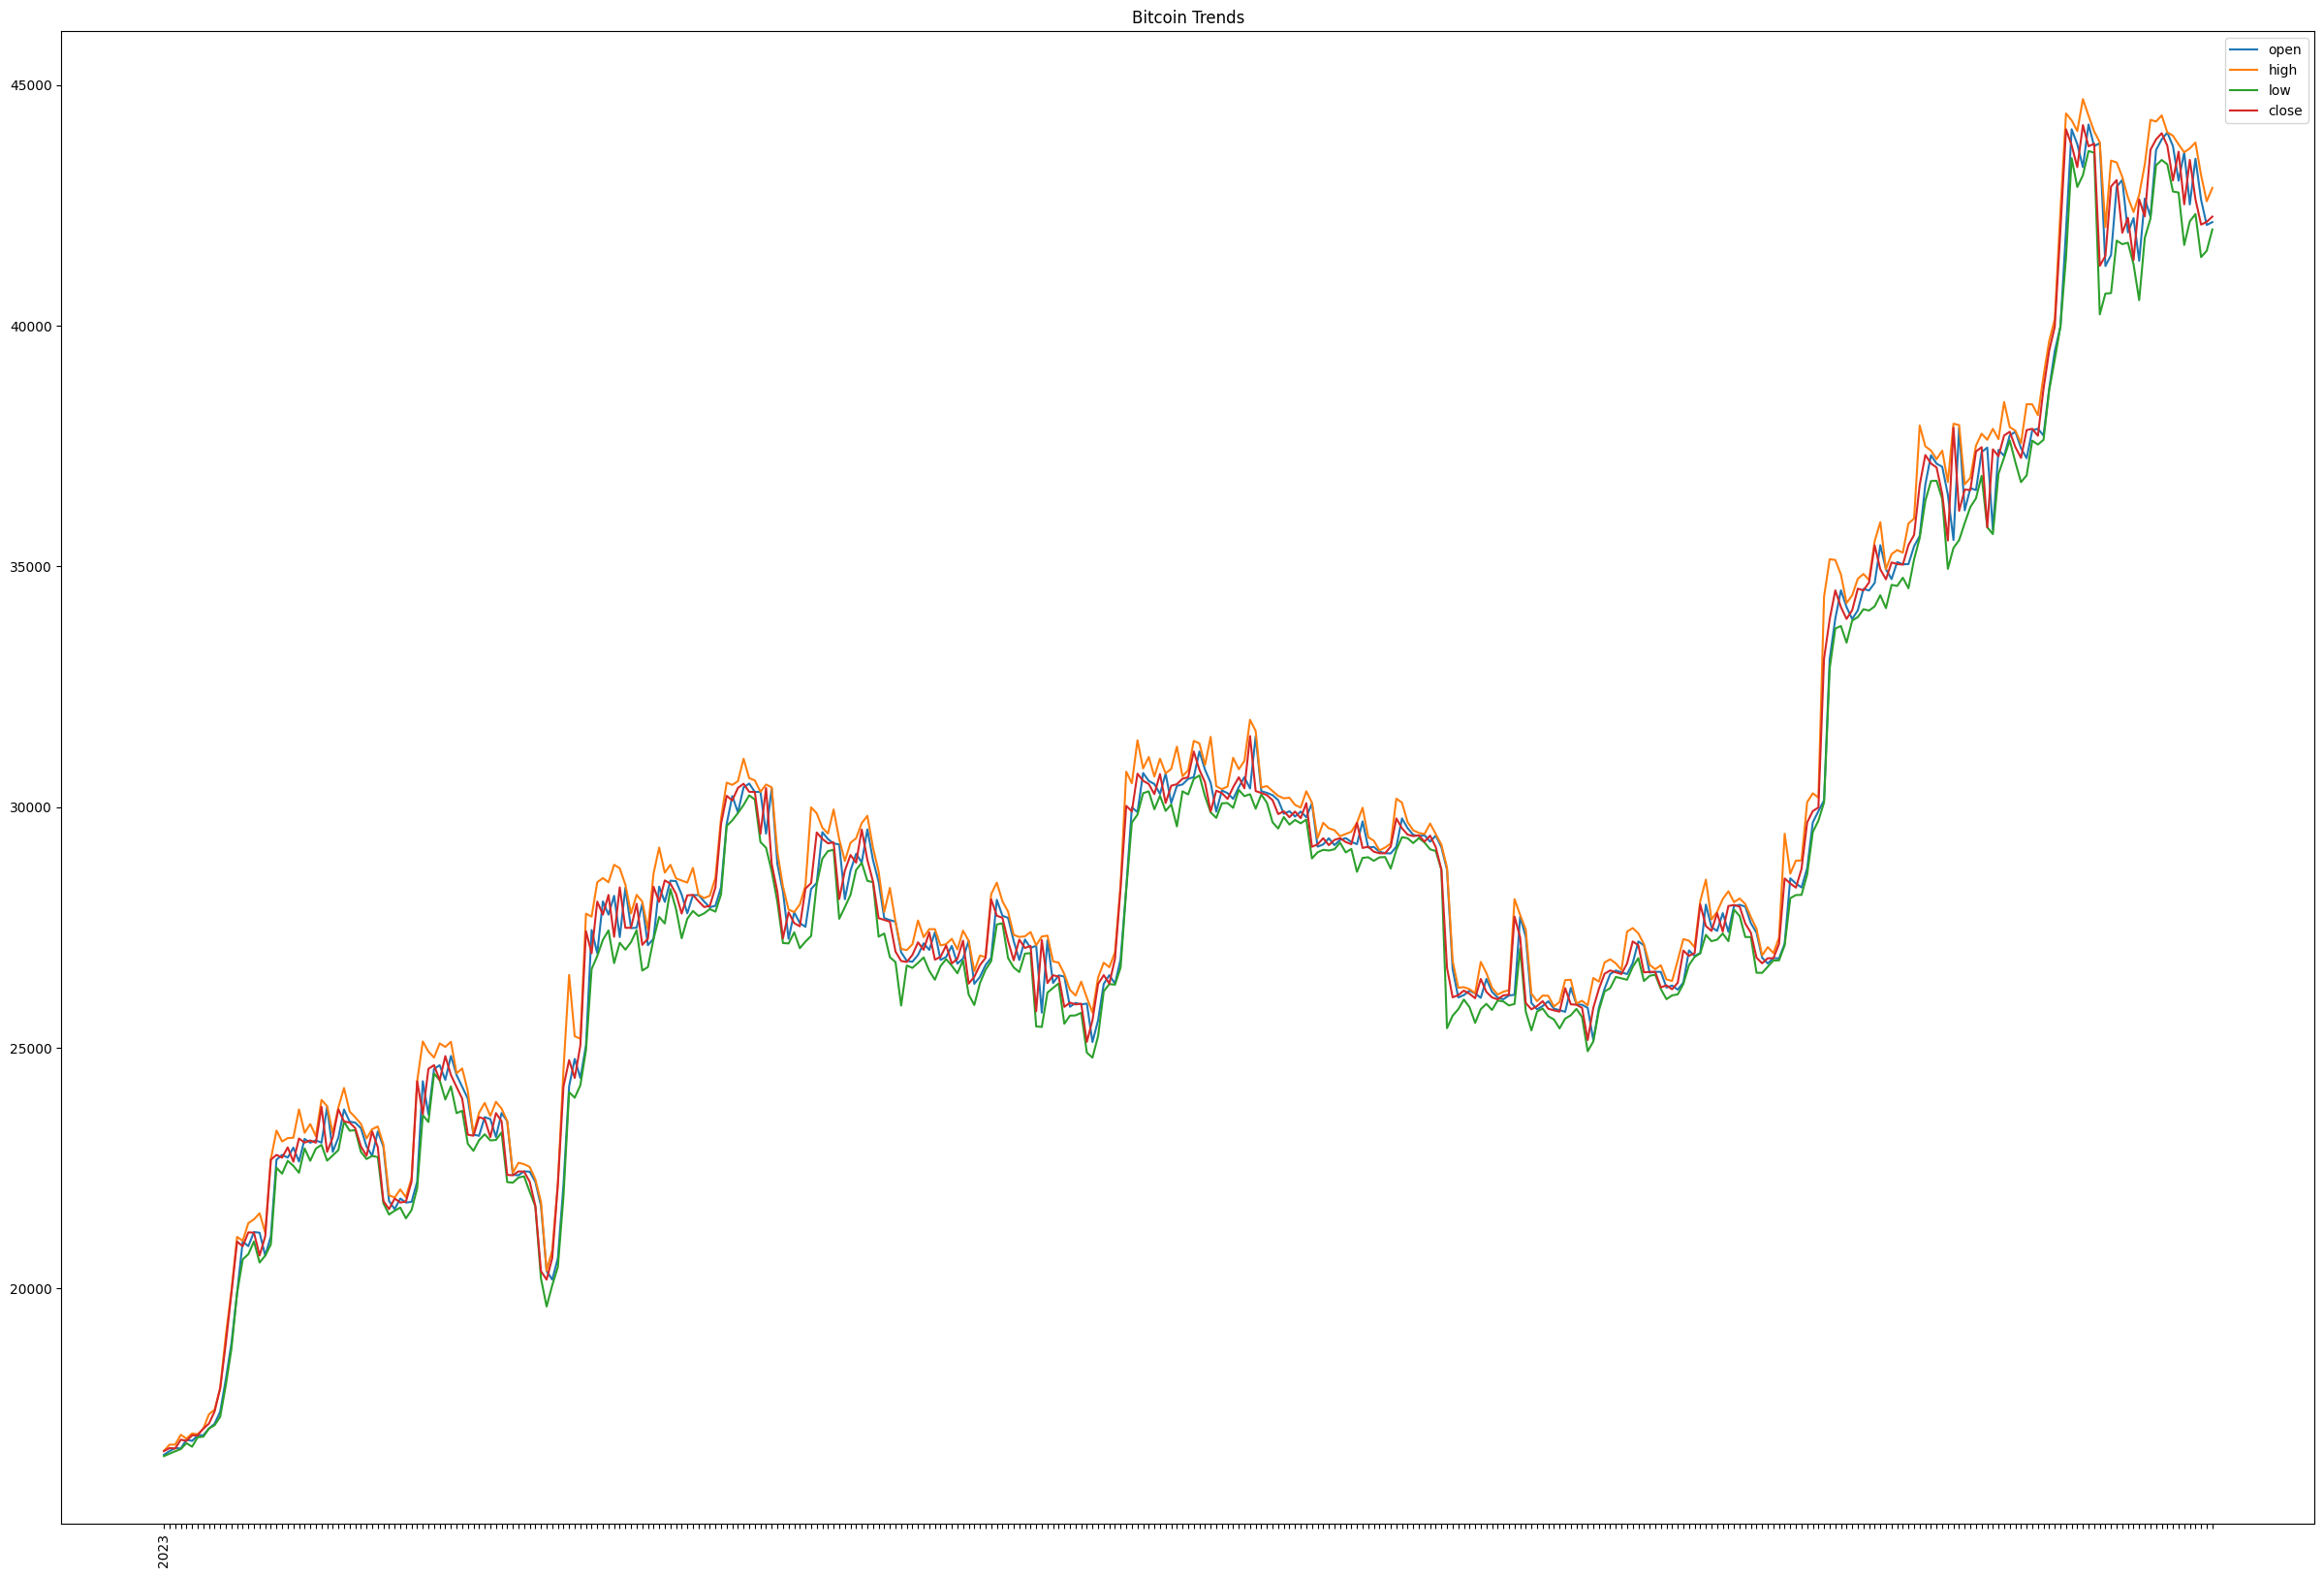

In [47]:
plt.figure(figsize=[30,20])
plt.plot(btc['date'],btc['open'])
plt.plot(btc['date'],btc['high'])
plt.plot(btc['date'],btc['low'])
plt.plot(btc['date'],btc['close'])
plt.xticks(btc['date'], date, rotation='vertical')
plt.legend(['open','high','low','close'])
plt.title('Bitcoin Trends')

Text(0.5, 1.0, 'Bitcoin Volume')

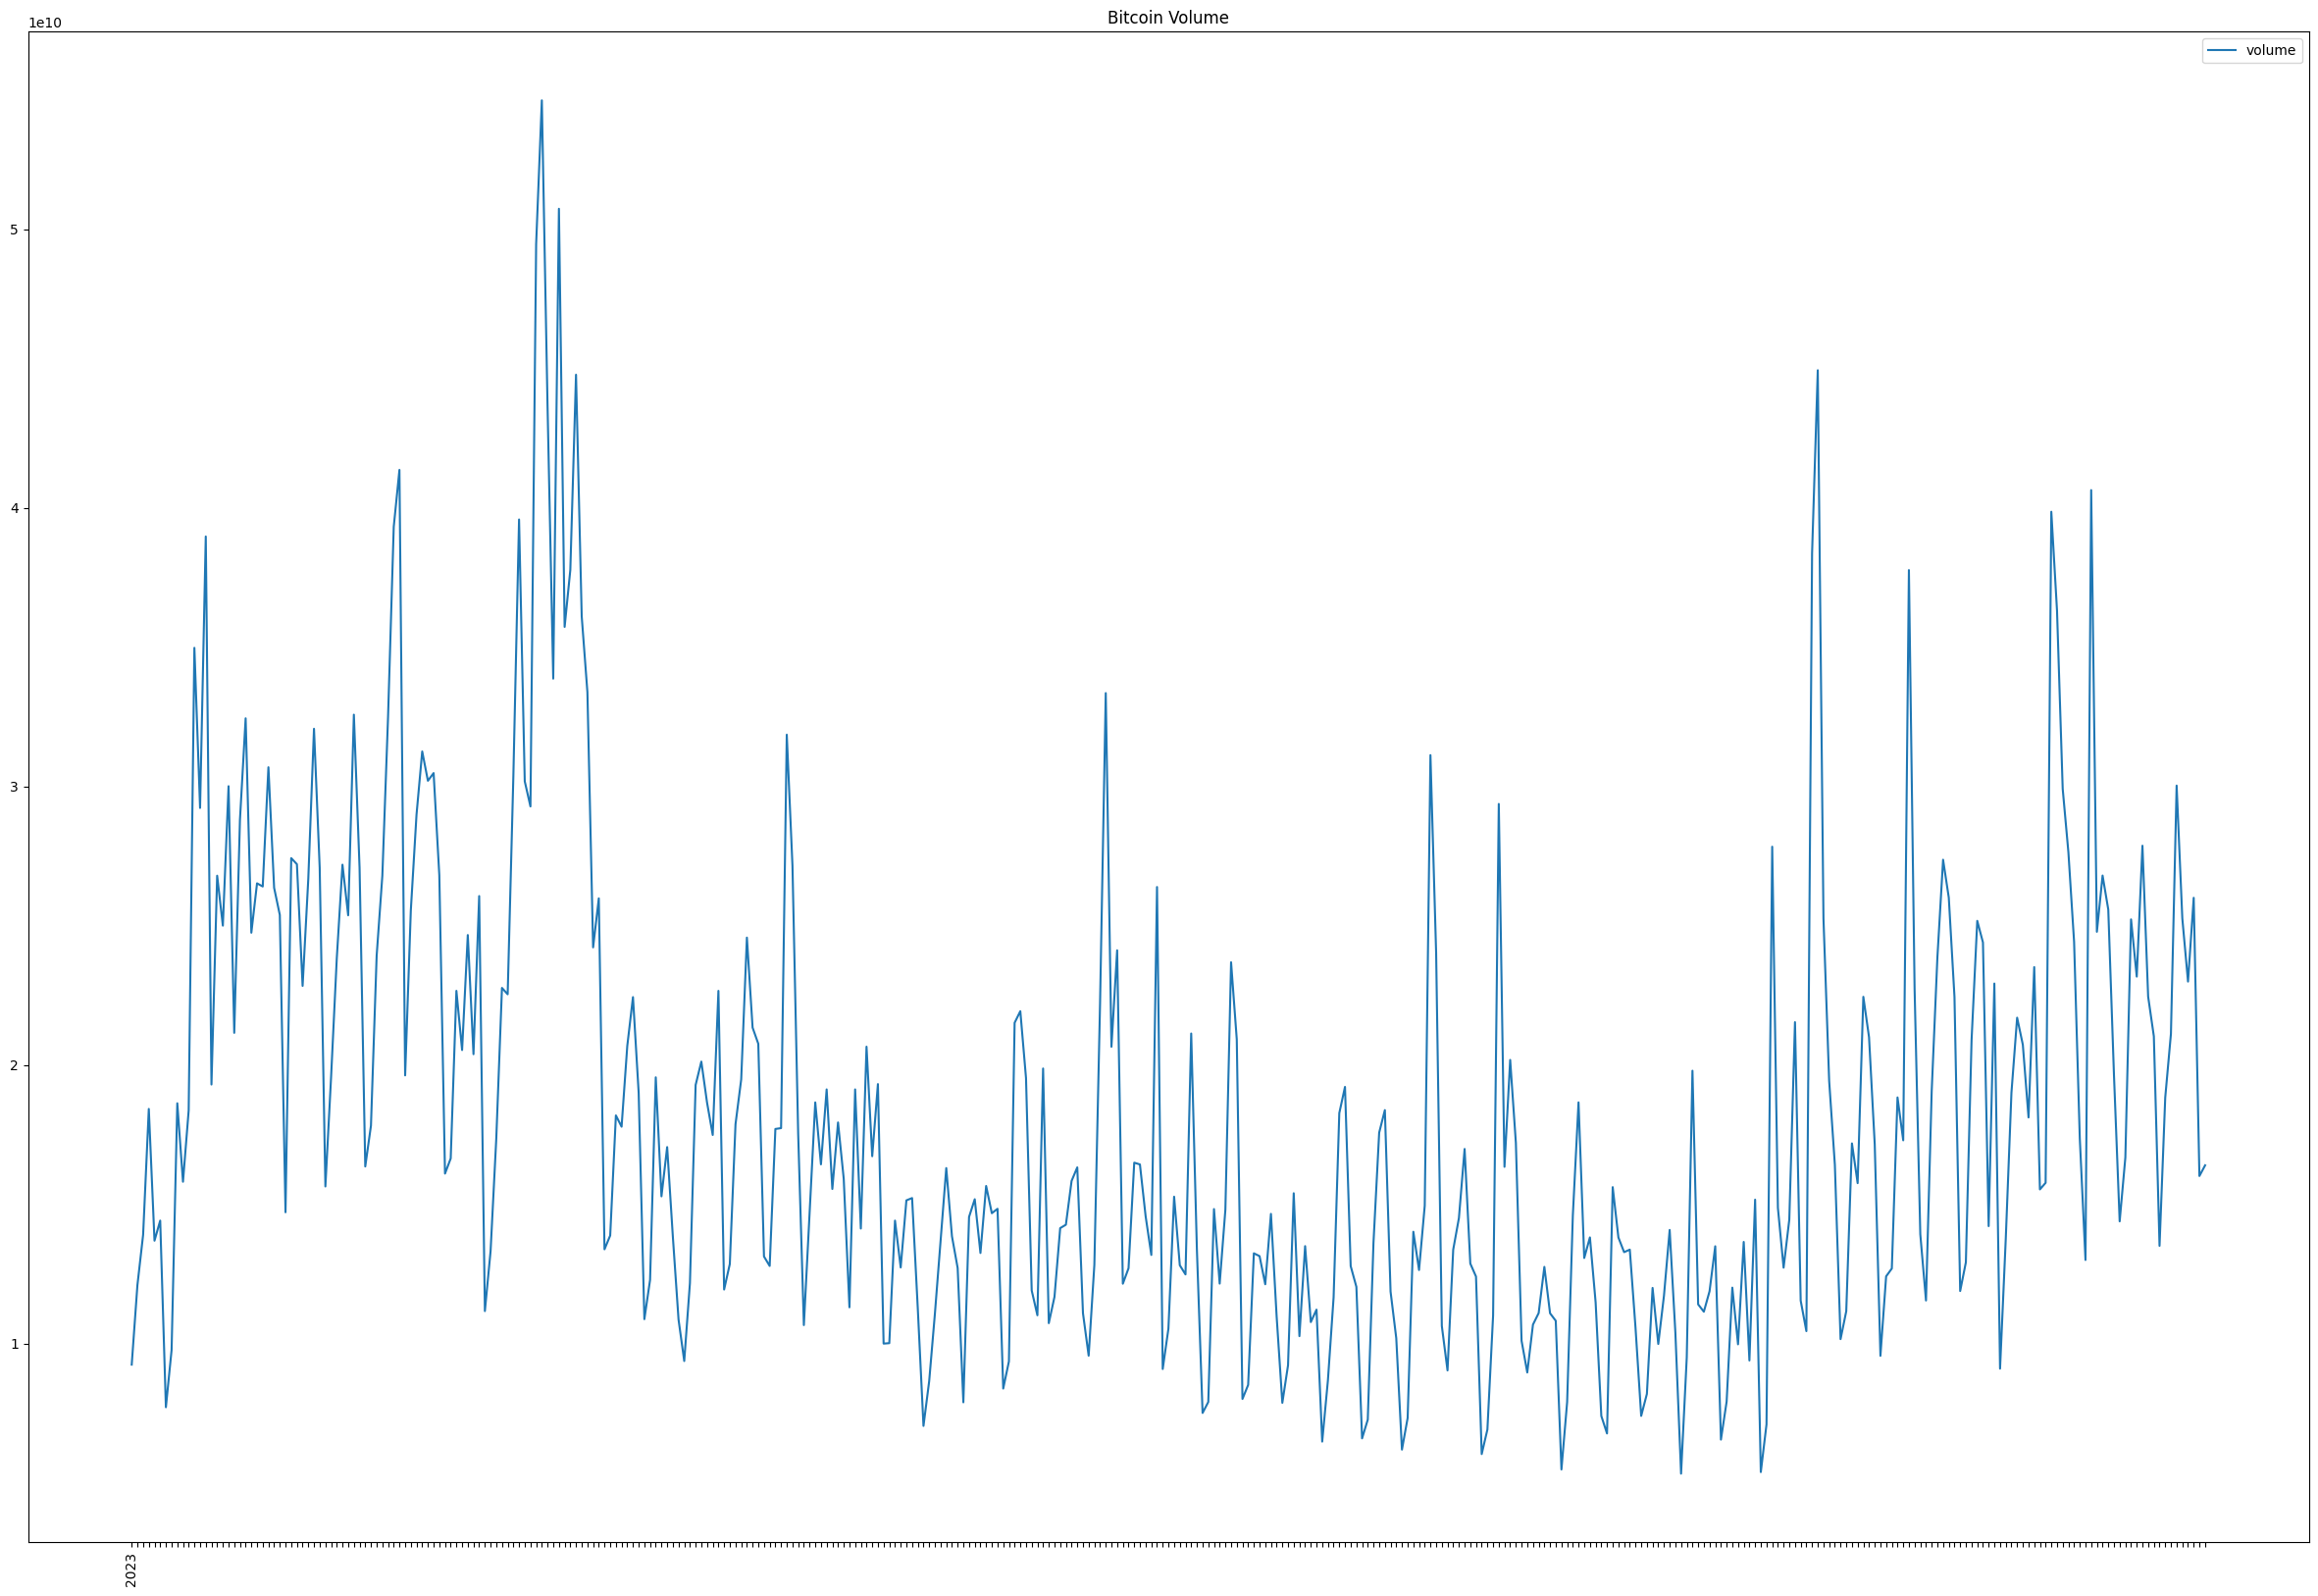

In [48]:
plt.figure(figsize=[30,20])
plt.plot(btc['date'],btc['volume'])
plt.xticks(btc['date'], date, rotation='vertical')
plt.legend(['volume'])
plt.title('Bitcoin Volume')

##Feature Engineering and Importance

Adding columns for calculationg RSI index  

In [49]:
N = 14  # Period for calculating averages

# Calculate daily price changes
btc['price_change'] = btc['close'].diff()

# Separate gains and losses
btc['gain'] = btc['price_change'].apply(lambda x: max(x, 0))
btc['loss'] = btc['price_change'].apply(lambda x: max(-x, 0))

# Calculate average gain and average loss
avg_gain = btc['gain'].rolling(window=N, min_periods=1).mean()
avg_loss = btc['loss'].rolling(window=N, min_periods=1).mean()

# Calculate relative strength (RS)
rs = avg_gain / avg_loss

# Calculate RSI
btc['rsi'] = 100 - (100 / (1 + rs))

In [50]:
btc['price_diff_tomorrow'] = - btc['close'].diff(periods=-1)  # difference with the following day
btc['price_diff_tmr_is_up'] = btc['price_diff_tomorrow'] > 0 #new feature to undrestand trend will be target
##try after week is up (3,7 days)

In [51]:
btc

,date,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,price_diff_tomorrow,price_diff_tmr_is_up
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,NaN,NaN,NaN,NaN,63.390625,True
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,63.390625,63.390625,0.000000,100.000000,-8.613281,False
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,-8.613281,0.000000,8.613281,88.037759,183.380859,True
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,183.380859,183.380859,0.000000,96.627332,-26.501953,False
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,-26.501953,0.000000,26.501953,87.542785,115.232422,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,922.453125,922.453125,0.000000,52.953577,-815.000000,False
361,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-815.000000,0.000000,815.000000,48.025001,-528.453125,False
362,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-528.453125,0.000000,528.453125,50.896402,57.500000,True
363,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945,57.500000,57.500000,0.000000,49.548220,108.285156,True


Adding additional features to identify if market is bull or bear

In [52]:
btc['is_bull'] = btc['rsi'] > 50
btc

,date,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,price_diff_tomorrow,price_diff_tmr_is_up,is_bull
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,NaN,NaN,NaN,NaN,63.390625,True,False
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,63.390625,63.390625,0.000000,100.000000,-8.613281,False,True
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,-8.613281,0.000000,8.613281,88.037759,183.380859,True,True
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,183.380859,183.380859,0.000000,96.627332,-26.501953,False,True
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,-26.501953,0.000000,26.501953,87.542785,115.232422,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,922.453125,922.453125,0.000000,52.953577,-815.000000,False,True
361,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-815.000000,0.000000,815.000000,48.025001,-528.453125,False,False
362,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-528.453125,0.000000,528.453125,50.896402,57.500000,True,True
363,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945,57.500000,57.500000,0.000000,49.548220,108.285156,True,False


Adding features to identify if the market is overfitted

In [53]:
btc['overbought'] = btc['rsi'] > 70

In [54]:
btc['oversold'] = btc['rsi'] < 30

In [55]:
btc

,date,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,price_diff_tomorrow,price_diff_tmr_is_up,is_bull,overbought,oversold
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,NaN,NaN,NaN,NaN,63.390625,True,False,False,False
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,63.390625,63.390625,0.000000,100.000000,-8.613281,False,True,True,False
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,-8.613281,0.000000,8.613281,88.037759,183.380859,True,True,True,False
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,183.380859,183.380859,0.000000,96.627332,-26.501953,False,True,True,False
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,-26.501953,0.000000,26.501953,87.542785,115.232422,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,922.453125,922.453125,0.000000,52.953577,-815.000000,False,True,False,False
361,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-815.000000,0.000000,815.000000,48.025001,-528.453125,False,False,False,False
362,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-528.453125,0.000000,528.453125,50.896402,57.500000,True,True,False,False
363,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945,57.500000,57.500000,0.000000,49.548220,108.285156,True,False,False,False


In [56]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  365 non-null    object 
 1   open                  365 non-null    float64
 2   high                  365 non-null    float64
 3   low                   365 non-null    float64
 4   close                 365 non-null    float64
 5   adj_close             365 non-null    float64
 6   volume                365 non-null    int64  
 7   price_change          364 non-null    float64
 8   gain                  364 non-null    float64
 9   loss                  364 non-null    float64
 10  rsi                   364 non-null    float64
 11  price_diff_tomorrow   364 non-null    float64
 12  price_diff_tmr_is_up  365 non-null    bool   
 13  is_bull               365 non-null    bool   
 14  overbought            365 non-null    bool   
 15  oversold              3

In [57]:
btc.describe()

,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,price_diff_tomorrow
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02,364.000000,364.000000,364.000000,364.000000,364.000000
mean,28788.795848,29266.231914,28390.678382,28859.448250,28859.448250,1.825093e+10,70.439856,254.659448,184.219592,57.106453,70.439856
std,5892.166892,5992.323174,5784.799153,5899.981222,5899.981222,8.529512e+09,653.842870,461.742757,346.726305,19.637978,653.842870
min,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,5.331173e+09,-2535.867188,0.000000,0.000000,6.597931,-2535.867188
25%,25920.257813,26220.201172,25657.025391,25931.472656,25931.472656,1.212860e+10,-210.422852,0.000000,0.000000,44.426538,-210.422852
50%,27745.123047,28178.384766,27242.880859,27767.236328,27767.236328,1.610072e+10,-0.224609,0.000000,0.224609,55.362713,-0.224609
75%,30297.472656,30601.740234,29955.744141,30315.355469,30315.355469,2.283783e+10,370.674316,370.674316,210.422852,70.067128,370.674316
max,44180.019531,44705.515625,43627.597656,44166.601563,44166.601563,5.462223e+10,3092.337891,3092.337891,2535.867188,100.000000,3092.337891


Adding a calculated feature for the trend change

In [58]:
btc['trend_change'] = ((btc['is_bull'] == True) & (btc['overbought'] == True)) | ((btc['is_bull'] == False) & (btc['oversold'] == True))
btc

,date,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,price_diff_tomorrow,price_diff_tmr_is_up,is_bull,overbought,oversold,trend_change
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,NaN,NaN,NaN,NaN,63.390625,True,False,False,False,False
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,63.390625,63.390625,0.000000,100.000000,-8.613281,False,True,True,False,True
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,-8.613281,0.000000,8.613281,88.037759,183.380859,True,True,True,False,True
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,183.380859,183.380859,0.000000,96.627332,-26.501953,False,True,True,False,True
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,-26.501953,0.000000,26.501953,87.542785,115.232422,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,922.453125,922.453125,0.000000,52.953577,-815.000000,False,True,False,False,False
361,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-815.000000,0.000000,815.000000,48.025001,-528.453125,False,False,False,False,False
362,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-528.453125,0.000000,528.453125,50.896402,57.500000,True,True,False,False,False
363,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945,57.500000,57.500000,0.000000,49.548220,108.285156,True,False,False,False,False


In [59]:
btc['tomorrow_trend_change'] = btc['trend_change'].shift(-1)
btc

,date,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,price_diff_tomorrow,price_diff_tmr_is_up,is_bull,overbought,oversold,trend_change,tomorrow_trend_change
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,NaN,NaN,NaN,NaN,63.390625,True,False,False,False,False,True
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,63.390625,63.390625,0.000000,100.000000,-8.613281,False,True,True,False,True,True
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,-8.613281,0.000000,8.613281,88.037759,183.380859,True,True,True,False,True,True
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,183.380859,183.380859,0.000000,96.627332,-26.501953,False,True,True,False,True,True
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,-26.501953,0.000000,26.501953,87.542785,115.232422,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,922.453125,922.453125,0.000000,52.953577,-815.000000,False,True,False,False,False,False
361,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-815.000000,0.000000,815.000000,48.025001,-528.453125,False,False,False,False,False,False
362,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-528.453125,0.000000,528.453125,50.896402,57.500000,True,True,False,False,False,False
363,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945,57.500000,57.500000,0.000000,49.548220,108.285156,True,False,False,False,False,False


In [60]:
btc = btc.fillna(0)

Analyzing new features

In [61]:
col = ['date','close', 'rsi', 'is_bull', 'overbought', 'oversold', 'trend_change', 'price_diff_tmr_is_up']

df = btc[col].tail(30)
df

,date,close,rsi,is_bull,overbought,oversold,trend_change,price_diff_tmr_is_up
335,2023-12-02,39476.332031,68.343655,True,False,False,False,True
336,2023-12-03,39978.390625,67.095890,True,False,False,False,True
337,2023-12-04,41980.097656,73.721692,True,True,False,True,True
338,2023-12-05,44080.648438,91.629685,True,True,False,True,False
339,2023-12-06,43746.445313,86.520132,True,True,False,True,False
340,2023-12-07,43292.664063,83.515006,True,True,False,True,True
341,2023-12-08,44166.601563,84.292472,True,True,False,True,False
342,2023-12-09,43725.984375,80.365197,True,True,False,True,True
343,2023-12-10,43779.699219,83.163801,True,True,False,True,False
344,2023-12-11,41243.832031,66.890908,True,False,False,False,True


##Feature Correlation analysis

In [62]:
btc_num = btc.copy()
#btc_num = btc.drop(['date'], axis=1)
#btc_num.describe()
btc_num

,date,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,price_diff_tomorrow,price_diff_tmr_is_up,is_bull,overbought,oversold,trend_change,tomorrow_trend_change
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,0.000000,0.000000,0.000000,0.000000,63.390625,True,False,False,False,False,True
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,63.390625,63.390625,0.000000,100.000000,-8.613281,False,True,True,False,True,True
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,-8.613281,0.000000,8.613281,88.037759,183.380859,True,True,True,False,True,True
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,183.380859,183.380859,0.000000,96.627332,-26.501953,False,True,True,False,True,True
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,-26.501953,0.000000,26.501953,87.542785,115.232422,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,922.453125,922.453125,0.000000,52.953577,-815.000000,False,True,False,False,False,False
361,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-815.000000,0.000000,815.000000,48.025001,-528.453125,False,False,False,False,False,False
362,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-528.453125,0.000000,528.453125,50.896402,57.500000,True,True,False,False,False,False
363,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945,57.500000,57.500000,0.000000,49.548220,108.285156,True,False,False,False,False,False


In [63]:
btc_num.corr()

<ipython-input-63-273171fff29d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  btc_num.corr()


,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,price_diff_tomorrow,price_diff_tmr_is_up,is_bull,overbought,oversold,trend_change
open,1.000000,0.995706,0.997305,0.993896,0.993896,0.008816,-0.043742,0.057899,0.159563,0.085436,-0.039982,-0.009478,0.163643,-0.018147,-0.171105,-0.116506
high,0.995706,1.000000,0.995209,0.998031,0.998031,0.060524,0.032676,0.142697,0.128441,0.108245,-0.037887,-0.013238,0.183213,-0.000574,-0.182340,-0.106912
low,0.997305,0.995209,1.000000,0.996887,0.996887,-0.013093,0.007581,0.080470,0.092876,0.096440,-0.045946,-0.016865,0.169792,-0.009121,-0.181017,-0.113994
close,0.993896,0.998031,0.996887,1.000000,1.000000,0.031300,0.066687,0.152773,0.077749,0.111789,-0.045269,-0.020428,0.183475,0.003445,-0.185124,-0.104842
adj_close,0.993896,0.998031,0.996887,1.000000,1.000000,0.031300,0.066687,0.152773,0.077749,0.111789,-0.045269,-0.020428,0.183475,0.003445,-0.185124,-0.104842
volume,0.008816,0.060524,-0.013093,0.031300,0.031300,1.000000,0.206254,0.460676,0.224708,0.263752,0.089085,0.014415,0.245716,0.246085,-0.059681,0.191328
price_change,-0.043742,0.032676,0.007581,0.066687,0.066687,0.206254,1.000000,0.861806,-0.737341,0.242122,-0.047620,-0.100425,0.181690,0.195861,-0.129082,0.104682
gain,0.057899,0.142697,0.080470,0.152773,0.152773,0.460676,0.861806,1.000000,-0.292794,0.234876,-0.006212,-0.067524,0.209372,0.162622,-0.117392,0.080957
loss,0.159563,0.128441,0.092876,0.077749,0.077749,0.224708,-0.737341,-0.292794,1.000000,-0.143616,0.081494,0.099381,-0.063664,-0.152636,0.086990,-0.089516
rsi,0.085436,0.108245,0.096440,0.111789,0.111789,0.263752,0.242122,0.234876,-0.143616,1.000000,0.011989,-0.015856,0.757313,0.773733,-0.535559,0.398582


<ipython-input-64-630333536b56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(btc_num.corr(), cmap="summer", annot=True, fmt='.3f')


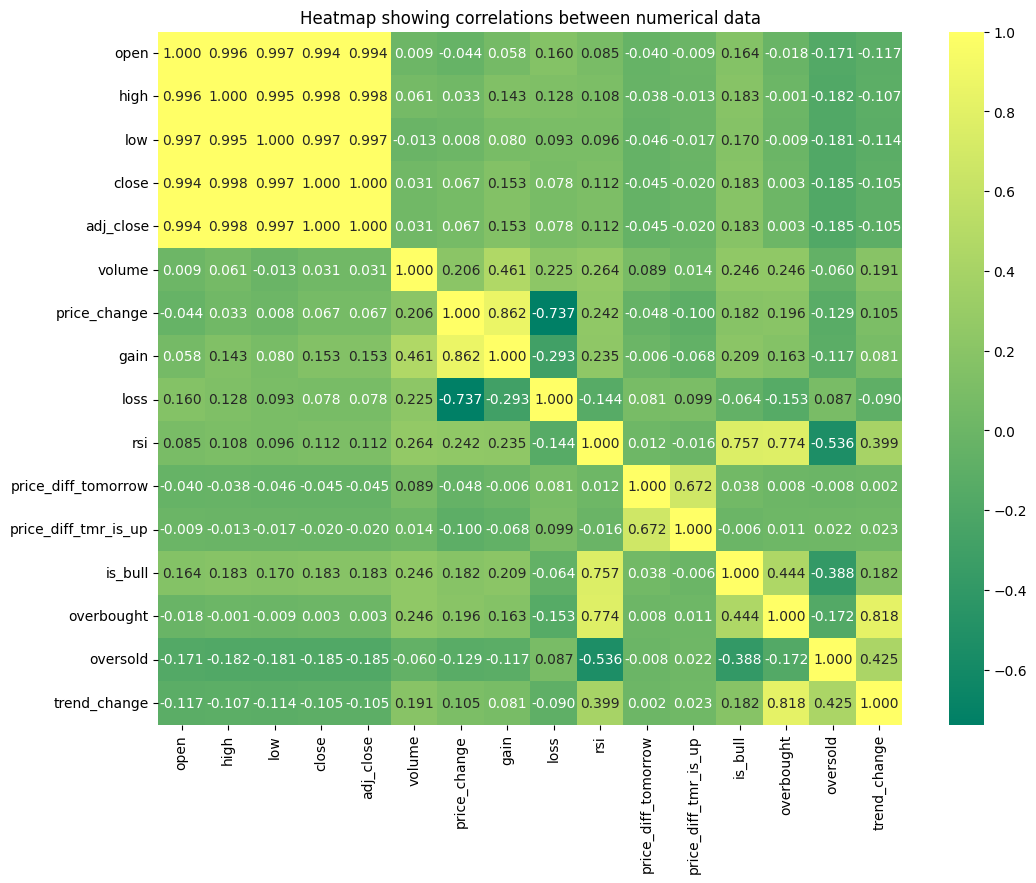

In [64]:
plt.figure(figsize=(12, 9))
sns.heatmap(btc_num.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

##Split the data

Since trading data has temporal patters and not evenly split around the year, the approach for data split will be to perform a chronological split, where the earlier part of the time series will be used for training, the middle part for validation, and the latest part for testing. This ensures that the model is trained on past data and validated on a more recent period

In [65]:
len(btc)

365

In [ ]:

# Assuming 'date' column is in datetime format
#btc['date'] = pd.to_datetime(btc['date'])

# Filter data for the specified date range
#btc_filtered = btc[(btc['date'] >= '2022-01-01') & (btc['date'] <= '2022-10-31')]

# Sort the filtered DataFrame by date
#btc_filtered = btc_filtered.sort_values('date')

btc = btc.sort_values('date')  # Sort the DataFrame by date

# Set the proportions for train, validation, and test sets
train_ratio = 0.6
val_ratio = 0.2

# Calculating the number of samples for each set
num_samples = len(btc)
n_train = int(train_ratio * num_samples)
n_val = int(val_ratio * num_samples)

# Splitting the data
df_train = btc[:n_train]
df_val = btc[n_train:n_train + n_val]
df_test = btc[n_train + n_val:]

# Resetting the index after splitting
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)


In [67]:
len(df_train), len(df_val), len(df_test)

(219, 73, 73)

In [68]:
df_full_train = pd.concat([df_train, df_val])

In [69]:
df_train

,date,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,price_diff_tomorrow,price_diff_tmr_is_up,is_bull,overbought,oversold,trend_change,tomorrow_trend_change
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,0.000000,0.000000,0.000000,0.000000,63.390625,True,False,False,False,False,True
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,63.390625,63.390625,0.000000,100.000000,-8.613281,False,True,True,False,True,True
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,-8.613281,0.000000,8.613281,88.037759,183.380859,True,True,True,False,True,True
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,183.380859,183.380859,0.000000,96.627332,-26.501953,False,True,True,False,True,True
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,-26.501953,0.000000,26.501953,87.542785,115.232422,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2023-08-03,29161.812500,29375.707031,28959.488281,29178.679688,29178.679688,12780357746,26.720704,26.720704,0.000000,39.996215,-104.587891,False,False,False,False,False,False
215,2023-08-04,29174.382813,29302.078125,28885.335938,29074.091797,29074.091797,12036639988,-104.587891,0.000000,104.587891,36.332316,-31.964844,False,False,False,False,False,False
216,2023-08-05,29075.388672,29102.464844,28957.796875,29042.126953,29042.126953,6598366353,-31.964844,0.000000,31.964844,37.625912,-0.271484,False,False,False,False,False,False
217,2023-08-06,29043.701172,29160.822266,28963.833984,29041.855469,29041.855469,7269806994,-0.271484,0.000000,0.271484,30.221769,138.722656,True,False,False,False,False,False


In [70]:
df_test

,date,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,price_diff_tomorrow,price_diff_tmr_is_up,is_bull,overbought,oversold,trend_change,tomorrow_trend_change
0,2023-10-20,28732.812500,30104.085938,28601.669922,29682.949219,29682.949219,21536125230,963.142578,963.142578,0.000000,69.105899,235.462890,True,True,False,False,False,True
1,2023-10-21,29683.380859,30287.482422,29481.751953,29918.412109,29918.412109,11541146996,235.462890,235.462890,0.000000,70.490580,75.484375,True,True,True,False,True,True
2,2023-10-22,29918.654297,30199.433594,29720.312500,29993.896484,29993.896484,10446520040,75.484375,75.484375,0.000000,71.450485,3092.337891,True,True,True,False,True,True
3,2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,33086.234375,38363572311,3092.337891,3092.337891,0.000000,86.489584,815.292969,True,True,True,False,True,True
4,2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,33901.527344,44934999645,815.292969,815.292969,0.000000,89.880427,601.292969,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,922.453125,922.453125,0.000000,52.953577,-815.000000,False,True,False,False,False,False
69,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-815.000000,0.000000,815.000000,48.025001,-528.453125,False,False,False,False,False,False
70,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-528.453125,0.000000,528.453125,50.896402,57.500000,True,True,False,False,False,False
71,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945,57.500000,57.500000,0.000000,49.548220,108.285156,True,False,False,False,False,False


In [71]:
# Resetting the index after splitting
df_train.reset_index(drop=True, inplace=True)

Separting the dataset from the target values

In [72]:
# Old version
#y_train = df_train.trend_change.astype('int').values
#y_val = df_val.trend_change.astype('int').values
##y_test = df_test.trend_change.astype('int').values

#For the final model
#y_full_train = df_full_train.trend_change.values

In [73]:
#Used previoulsy
y_train = df_train.price_diff_tmr_is_up.astype('int').values
y_val = df_val.price_diff_tmr_is_up.astype('int').values
y_test = df_test.price_diff_tmr_is_up.astype('int').values

#For the final model
y_full_train = df_full_train.price_diff_tmr_is_up.values

In [74]:
#y_train = df_train.tomorrow_trend_change.astype('int').values
#y_val = df_val.tomorrow_trend_change.astype('int').values
#y_test = df_test.tomorrow_trend_change.astype('int').values

#For the final model
#y_full_train = df_full_train.tomorrow_trend_change.values

In [75]:
#Olda Previous solution
#del df_train['trend_change']
#del df_val['trend_change']
#del df_test['trend_change']

#For the final model
#del df_full_train['trend_change']


In [76]:
del df_train['price_diff_tmr_is_up']
del df_val['price_diff_tmr_is_up']
del df_test['price_diff_tmr_is_up']

del df_train['price_diff_tomorrow']
del df_val['price_diff_tomorrow']
del df_test['price_diff_tomorrow']

del df_train['tomorrow_trend_change']
del df_val['tomorrow_trend_change']
del df_test['tomorrow_trend_change']


#For the final model
del df_full_train['price_diff_tmr_is_up']
del df_full_train['price_diff_tomorrow']
del df_full_train['tomorrow_trend_change']


In [77]:
df_full_train

,date,open,high,low,close,adj_close,volume,price_change,gain,loss,rsi,is_bull,overbought,oversold,trend_change
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,0.000000,0.000000,0.000000,0.000000,False,False,False,False
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,63.390625,63.390625,0.000000,100.000000,True,True,False,True
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,-8.613281,0.000000,8.613281,88.037759,True,True,False,True
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,183.380859,183.380859,0.000000,96.627332,True,True,False,True
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,-26.501953,0.000000,26.501953,87.542785,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2023-10-15,26858.011719,27289.169922,26817.894531,27159.652344,27159.652344,7098201980,297.945313,297.945313,0.000000,38.145305,False,False,False,False
69,2023-10-16,27162.628906,29448.138672,27130.472656,28519.466797,28519.466797,27833876539,1359.814453,1359.814453,0.000000,61.279424,True,False,False,False
70,2023-10-17,28522.097656,28618.751953,28110.185547,28415.748047,28415.748047,14872527508,-103.718750,0.000000,103.718750,61.238734,True,False,False,False
71,2023-10-18,28413.531250,28889.009766,28174.251953,28328.341797,28328.341797,12724128586,-87.406250,0.000000,87.406250,56.444949,True,False,False,False


Adding vectorization

In [78]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

#Training the model

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, f1_score
import xgboost as xgb
from tqdm import tqdm
from sklearn.model_selection import KFold

##Using Logistic regression model

In [80]:
model = LogisticRegression(solver='lbfgs',class_weight='balanced', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [82]:
from sklearn.metrics import f1_score

In [83]:
y_pred = model.predict(X_val)

In [84]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.5753424657534246

In [85]:
f1 = f1_score(y_val, y_pred)
f1

0.0

In [86]:
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
precision

0.0

In [88]:
recall

0.0

In [89]:
conf_matrix = confusion_matrix(y_val, y_pred)

# Compute precision, recall, f1-score, support (for each class)
classification_rep = classification_report(y_val, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        42
           1       0.00      0.00      0.00        31

    accuracy                           0.58        73
   macro avg       0.29      0.50      0.37        73
weighted avg       0.33      0.58      0.42        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Finding best regularizaiton for the Logsticregression model

In [90]:
scores = []

for C in [0.001, 0.1, 0.5, 1.0, 5, 10, 15, 100, 1000]:
    model = LogisticRegression(solver='lbfgs', C=C, max_iter=1000)
    #model = RidgeClassifier(solver='sag', alpha = C, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    scores.append((C, accuracy))
    print('C=%2f, Accuracy=%.3f' % (C, accuracy))

C=0.001000, Accuracy=0.575
C=0.100000, Accuracy=0.575
C=0.500000, Accuracy=0.575
C=1.000000, Accuracy=0.575
C=5.000000, Accuracy=0.575
C=10.000000, Accuracy=0.575
C=15.000000, Accuracy=0.575
C=100.000000, Accuracy=0.575
C=1000.000000, Accuracy=0.575


Conclusion: reguarization does not provide much impact

##Cross validation

In [92]:
# Define the number of splits for K-fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize lists to store scores
scores_accuracy = []
scores_f1 = []

# Define Logistic Regression parameters
logreg_params = {
    'solver': 'lbfgs',
    'C': 1.0,
    'max_iter': 1000,
}

# Loop through K-fold splits
for train_idx, val_idx in tqdm(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Initialize and train the Logistic Regression model
    model = LogisticRegression(**logreg_params)
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_pred_fold = model.predict(X_val_fold)

    # Evaluate accuracy and f1_score
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    f1_fold = f1_score(y_val_fold, y_pred_fold)

    # Store scores
    scores_accuracy.append(accuracy_fold)
    scores_f1.append(f1_fold)

# Calculate and print mean scores
mean_accuracy = np.mean(scores_accuracy)
mean_f1 = np.mean(scores_f1)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean F1 Score: {mean_f1:.4f}')

5it [00:00, 34.72it/s]

Mean Accuracy: 0.4521
Mean F1 Score: 0.2411


##Using Random Forest for training the model

In [93]:
rf = RandomForestClassifier(n_estimators=75, max_depth=10,  random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.5616438356164384

In [94]:
f1 = f1_score(y_val, y_pred)
f1

0.5675675675675677

In [95]:
conf_matrix = confusion_matrix(y_val, y_pred)

# Compute precision, recall, f1-score, support (for each class)
classification_rep = classification_report(y_val, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.67      0.48      0.56        42
           1       0.49      0.68      0.57        31

    accuracy                           0.56        73
   macro avg       0.58      0.58      0.56        73
weighted avg       0.59      0.56      0.56        73



FInding the optimal number of estimators and  maximum depth

In [96]:
scores = []
for d in  [None, 2,3, 4, 5, 10]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        #accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        scores.append((d, n, f1))

In [97]:
df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators', 'f1'])

In [98]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0])

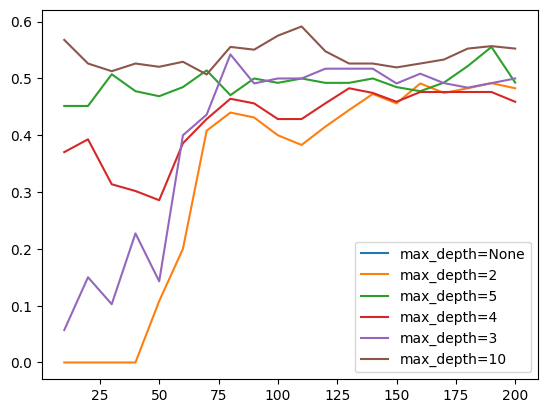

In [99]:
for d in [None, 2, 5, 4, 3, 10]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.f1,
             label='max_depth=%s' % d)

plt.legend()

based on the graph optimal number of estimators will be 110 with depth 10, as others give lower accuracy

##Random Forest with Cross Validation using KFold

In [100]:
# Define the number of splits for K-fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize lists to store scores
scores_accuracy = []
scores_f1 = []

# Define RandomForestClassifier parameters
rf_params = {
    'n_estimators': 110,
    'max_depth': 10,
    'random_state': 1,
}

# Loop through K-fold splits
for train_idx, val_idx in tqdm(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Initialize and train the RandomForestClassifier model
    rf = RandomForestClassifier(**rf_params)
    rf.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_pred_fold = rf.predict(X_val_fold)

    # Evaluate accuracy and f1_score
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    f1_fold = f1_score(y_val_fold, y_pred_fold)

    # Store scores
    scores_accuracy.append(accuracy_fold)
    scores_f1.append(f1_fold)

# Calculate and print mean scores
mean_accuracy = np.mean(scores_accuracy)
mean_f1 = np.mean(scores_f1)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean F1 Score: {mean_f1:.4f}')

5it [00:01,  4.83it/s]

Mean Accuracy: 0.5480
Mean F1 Score: 0.5352


##Using XGBoost model for training

In [430]:
!pip install xgboost

In [431]:
!pip install --upgrade xgboost

In [432]:
#features = dv.get_feature_names_out()
#dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
#dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [102]:
features = dv.get_feature_names_out()
features_list = features.tolist()  # Convert to a list of strings
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features_list)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features_list)


In [103]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [469]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,

}


model = xgb.train(xgb_params, dtrain, num_boost_round=80,
                  verbose_eval=5,
                  evals=watchlist)


In [475]:
# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy}')
print(f'Validation F1 score: {f1}')

Validation Accuracy: 0.5753424657534246
Validation F1 score: 0.5633802816901409


In [448]:
scores = {}

In [415]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [376]:
#y_pred = model.predict(dval)

In [377]:
#roc_auc_score(y_val, y_pred)

Finding optimal eta value

In [429]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [430]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1', 'eta=0.05', 'eta=1.0'])

In [431]:
df_score = parse_xgb_output(output)

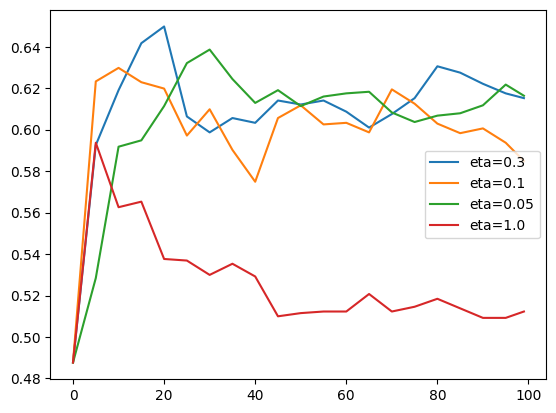

In [432]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

#plt.ylim(0.0, 0.2)
plt.legend()

Finding optimal mix_depth value

In [444]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [445]:
df_score = parse_xgb_output(output)

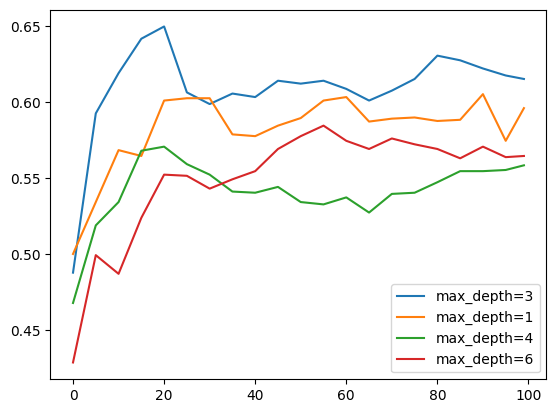

In [446]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()

Finding optimal min_child_weight value

In [462]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=5'

In [463]:
df_score = parse_xgb_output(output)

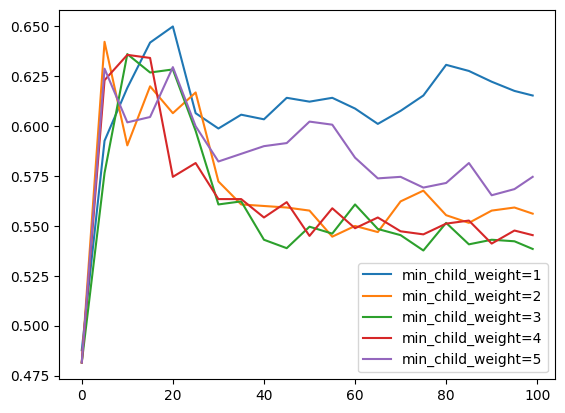

In [464]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

#plt.ylim(0.82, 0.84)
plt.legend()

In [388]:
s = output.stdout

In [389]:
print(s[:200])

[0]	train-rmse:0.48582	eval-rmse:0.49970
[5]	train-rmse:0.43487	eval-rmse:0.50058
[10]	train-rmse:0.41433	eval-rmse:0.51687
[15]	train-rmse:0.39462	eval-rmse:0.52546
[20]	train-rmse:0.37704	eval-rmse:


Based on parameter tuning for XGBoost model the optimal parameters are%
eta = 0.3
max_depth = 3
min_child_weight = 1
number of iterations = 20

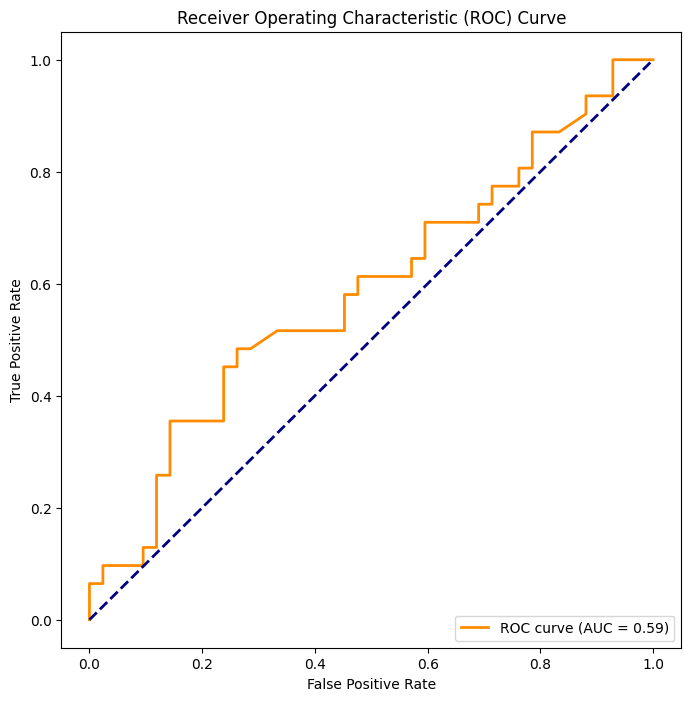

In [473]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities on the validation set
y_val_pred_prob = model.predict(dval)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [474]:
roc_auc_score(y_val, y_pred)

0.5844854070660521

Trying XGBoost Classifier

In [466]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create an XGBClassifier
model = XGBClassifier(
    objective='binary:logistic',  # 'binary:logistic' for binary classification
    eval_metric='auc',        # Evaluation metric, can be changed based on your preference
    eta=0.3,                      # Learning rate
    max_depth=3,                  # Maximum depth of the trees
    min_child_weight=1,           # Minimum sum of instance weight needed in a child
    nthread=8,                    # Number of parallel threads
    seed=1,                       # Random seed for reproducibility
)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], early_stopping_rounds=10)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
f1 = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy}')
print(f'Validation F1 score: {f1}')

[0]	validation_0-auc:0.71730	validation_1-auc:0.48771
[1]	validation_0-auc:0.77632	validation_1-auc:0.54531
[2]	validation_0-auc:0.80097	validation_1-auc:0.53648
[3]	validation_0-auc:0.84522	validation_1-auc:0.54032
[4]	validation_0-auc:0.85811	validation_1-auc:0.55184
[5]	validation_0-auc:0.87183	validation_1-auc:0.59255
[6]	validation_0-auc:0.88259	validation_1-auc:0.60023
[7]	validation_0-auc:0.89181	validation_1-auc:0.58833
[8]	validation_0-auc:0.90541	validation_1-auc:0.57143
[9]	validation_0-auc:0.91124	validation_1-auc:0.57296
[10]	validation_0-auc:0.92889	validation_1-auc:0.61905
[11]	validation_0-auc:0.93435	validation_1-auc:0.61905
[12]	validation_0-auc:0.94932	validation_1-auc:0.63172
[13]	validation_0-auc:0.95091	validation_1-auc:0.64171
[14]	validation_0-auc:0.95249	validation_1-auc:0.64171
[15]	validation_0-auc:0.95917	validation_1-auc:0.64171
[16]	validation_0-auc:0.96221	validation_1-auc:0.63134
[17]	validation_0-auc:0.96755	validation_1-auc:0.64363
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-auc:0.98974	validation_1-auc:0.60714
[28]	validation_0-auc:0.99082	validation_1-auc:0.60177
[29]	validation_0-auc:0.99124	validation_1-auc:0.59716
Validation Accuracy: 0.5753424657534246
Validation F1 score: 0.5753424657534246


In [471]:
# Assume class weights are inversely proportional to class frequencies
class_weights = len(y_train) / (2 * np.bincount(y_train))

xgb_params['scale_pos_weight'] = class_weights[1] / class_weights[0]

model = xgb.train(xgb_params, dtrain, num_boost_round=20, verbose_eval=5, evals=watchlist)


[0]	train-auc:0.73907	eval-auc:0.49539
[5]	train-auc:0.89181	eval-auc:0.62020
[10]	train-auc:0.91717	eval-auc:0.62519
[15]	train-auc:0.94987	eval-auc:0.56029
[19]	train-auc:0.96296	eval-auc:0.58756


##Cross validation for XGBoost using KFold

In [104]:


# Define the number of splits for K-fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize lists to store scores
scores_accuracy = []
scores_f1 = []

# Define XGBoost parameters
xgb_params = {
    'eta': 0.3,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Loop through K-fold splits
for train_idx, val_idx in tqdm(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Create DMatrix for XGBoost
    dtrain_fold = xgb.DMatrix(X_train_fold, label=y_train_fold, feature_names=features_list)
    dval_fold = xgb.DMatrix(X_val_fold, label=y_val_fold, feature_names=features_list)

    # Train the XGBoost model
    model = xgb.train(xgb_params, dtrain_fold, num_boost_round=60, verbose_eval=5, evals=[(dtrain_fold, 'train'), (dval_fold, 'eval')])

    # Predict on the validation fold
    y_pred_fold = model.predict(dval_fold)

    # Convert probabilities to binary predictions
    y_pred_fold_binary = (y_pred_fold > 0.5).astype(int)

    # Evaluate accuracy and f1_score
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold_binary)
    f1_fold = f1_score(y_val_fold, y_pred_fold_binary)

    # Store scores
    scores_accuracy.append(accuracy_fold)
    scores_f1.append(f1_fold)

# Calculate and print mean scores
mean_accuracy = np.mean(scores_accuracy)
mean_f1 = np.mean(scores_f1)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean F1 Score: {mean_f1:.4f}')

0it [00:00, ?it/s]

[0]	train-auc:0.72174	eval-auc:0.49062
[5]	train-auc:0.89783	eval-auc:0.61250
[10]	train-auc:0.94551	eval-auc:0.67500
[15]	train-auc:0.98384	eval-auc:0.66146
[20]	train-auc:0.99294	eval-auc:0.65729
[25]	train-auc:0.99516	eval-auc:0.65938
[30]	train-auc:0.99751	eval-auc:0.65312
[35]	train-auc:0.99922	eval-auc:0.66667
[40]	train-auc:1.00000	eval-auc:0.67708
[45]	train-auc:1.00000	eval-auc:0.68542
[50]	train-auc:1.00000	eval-auc:0.68958
[55]	train-auc:1.00000	eval-auc:0.68750
[59]	train-auc:1.00000	eval-auc:0.69167


1it [00:00,  3.03it/s]

[0]	train-auc:0.70843	eval-auc:0.63561
[5]	train-auc:0.89869	eval-auc:0.62112
[10]	train-auc:0.94013	eval-auc:0.56315
[15]	train-auc:0.97294	eval-auc:0.56936
[20]	train-auc:0.98745	eval-auc:0.57764
[25]	train-auc:0.99660	eval-auc:0.56522
[30]	train-auc:0.99817	eval-auc:0.59006
[35]	train-auc:0.99908	eval-auc:0.59627
[40]	train-auc:1.00000	eval-auc:0.58178
[45]	train-auc:1.00000	eval-auc:0.56936
[50]	train-auc:1.00000	eval-auc:0.57971
[55]	train-auc:1.00000	eval-auc:0.58178
[59]	train-auc:1.00000	eval-auc:0.57557


2it [00:00,  3.12it/s]

[0]	train-auc:0.74993	eval-auc:0.48438
[5]	train-auc:0.92444	eval-auc:0.42812
[10]	train-auc:0.95546	eval-auc:0.42083
[15]	train-auc:0.97179	eval-auc:0.43958
[20]	train-auc:0.98224	eval-auc:0.45208
[25]	train-auc:0.98942	eval-auc:0.46042
[30]	train-auc:0.99582	eval-auc:0.45417
[35]	train-auc:0.99778	eval-auc:0.45625
[40]	train-auc:0.99922	eval-auc:0.47292
[45]	train-auc:1.00000	eval-auc:0.46042
[50]	train-auc:1.00000	eval-auc:0.45833
[55]	train-auc:1.00000	eval-auc:0.43750
[59]	train-auc:1.00000	eval-auc:0.44375


3it [00:00,  3.22it/s]

[0]	train-auc:0.74830	eval-auc:0.60577
[5]	train-auc:0.89327	eval-auc:0.55449
[10]	train-auc:0.95268	eval-auc:0.52991
[15]	train-auc:0.97935	eval-auc:0.49573
[20]	train-auc:0.98288	eval-auc:0.51709
[25]	train-auc:0.99359	eval-auc:0.51068
[30]	train-auc:0.99608	eval-auc:0.52350
[35]	train-auc:0.99739	eval-auc:0.53205
[40]	train-auc:0.99974	eval-auc:0.51068
[45]	train-auc:0.99974	eval-auc:0.48504
[50]	train-auc:0.99974	eval-auc:0.50214
[55]	train-auc:1.00000	eval-auc:0.49573
[59]	train-auc:1.00000	eval-auc:0.49145


4it [00:01,  3.22it/s]

[0]	train-auc:0.73465	eval-auc:0.54022
[5]	train-auc:0.89063	eval-auc:0.67391
[10]	train-auc:0.92573	eval-auc:0.64891
[15]	train-auc:0.95171	eval-auc:0.64565
[20]	train-auc:0.98177	eval-auc:0.66087
[25]	train-auc:0.98565	eval-auc:0.63261
[30]	train-auc:0.99379	eval-auc:0.58696
[35]	train-auc:0.99806	eval-auc:0.58478
[40]	train-auc:0.99961	eval-auc:0.58043
[45]	train-auc:0.99987	eval-auc:0.58696
[50]	train-auc:0.99961	eval-auc:0.58696
[55]	train-auc:0.99974	eval-auc:0.57174
[59]	train-auc:1.00000	eval-auc:0.56957


5it [00:01,  3.21it/s]

Mean Accuracy: 0.5386
Mean F1 Score: 0.5059


##Conclusion on Model Selection

Randon Forest has shown higher f1 score comparing to other models, but the results were close, so will train both XGBoost and RandomForest on and will validate their performance of the full test dataset

##Training the final selected model

In [105]:
from sklearn.metrics import f1_score

In [106]:
dicts_full_train = df_full_train.to_dict(orient='records')
#dicts_train = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [107]:
rf = RandomForestClassifier(n_estimators=110, max_depth=10, class_weight = 'balanced', random_state=1)
rf.fit(X_full_train, y_full_train)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4246575342465753

In [108]:
# Use DictVectorizer to transform dictionaries into feature matrices
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
X_test = dv.transform(dicts_test)

# Initialize your model
rf = RandomForestClassifier(n_estimators=110, max_depth=10, class_weight='balanced', random_state=1)

# Assuming y_full_train and y_test are your target variables

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores_accuracy = []
scores_f1 = []

for train_idx, test_idx in tqdm(kf.split(X_full_train)):
    X_train_fold, X_val_fold = X_full_train[train_idx], X_full_train[test_idx]
    y_train_fold, y_val_fold = y_full_train[train_idx], y_full_train[test_idx]  # Corrected line

    # Fit the model on the training fold
    rf.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_pred_fold = rf.predict(X_val_fold)

    # Evaluate accuracy and f1_score
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    f1_fold = f1_score(y_val_fold, y_pred_fold)

    scores_accuracy.append(accuracy_fold)
    scores_f1.append(f1_fold)

# Calculate mean and standard deviation of scores on validation set
mean_accuracy = np.mean(scores_accuracy)
std_accuracy = np.std(scores_accuracy)

mean_f1 = np.mean(scores_f1)
std_f1 = np.std(scores_f1)

print(f'Mean Accuracy: {mean_accuracy:.3f} +- {std_accuracy:.3f}')
print(f'Mean F1 Score: {mean_f1:.3f} +- {std_f1:.3f}')

# Now, you can train your final model on the full training set and make predictions on the test set
rf.fit(X_full_train, y_full_train)
final_predictions = rf.predict(X_test)


10it [00:02,  4.68it/s]


Mean Accuracy: 0.524 +- 0.074
Mean F1 Score: 0.452 +- 0.128


In [109]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute precision, recall, f1-score, support (for each class)
classification_rep = classification_report(y_val, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        42
           1       0.00      0.00      0.00        31

    accuracy                           0.58        73
   macro avg       0.29      0.50      0.37        73
weighted avg       0.33      0.58      0.42        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

rf = RandomForestClassifier(n_estimators=80, max_depth=10,  random_state=1)
rf.fit(X_full_train, y_full_train)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1

0.0

Training XGBoost

In [111]:
features = dv.get_feature_names_out()
features_list = features.tolist()  # Convert to a list of strings
dtrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features_list)
dval = xgb.DMatrix(X_test, label=y_test, feature_names=features_list)

In [112]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [113]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,

}


model = xgb.train(xgb_params, dtrain, num_boost_round=60,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.68047	eval-auc:0.52688
[5]	train-auc:0.85543	eval-auc:0.52458
[10]	train-auc:0.90687	eval-auc:0.50922
[15]	train-auc:0.94160	eval-auc:0.51805
[20]	train-auc:0.95387	eval-auc:0.52727
[25]	train-auc:0.97261	eval-auc:0.55031
[30]	train-auc:0.97701	eval-auc:0.55338
[35]	train-auc:0.98531	eval-auc:0.52957
[40]	train-auc:0.99013	eval-auc:0.55069
[45]	train-auc:0.99563	eval-auc:0.53802
[50]	train-auc:0.99746	eval-auc:0.52573
[55]	train-auc:0.99812	eval-auc:0.52611
[59]	train-auc:0.99944	eval-auc:0.54071


In [114]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy}')
print(f'Validation F1 score: {f1}')

Validation Accuracy: 0.4246575342465753
Validation F1 score: 0.0


In [115]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score

# Assuming you have X_full_train and y_full_train

# Define the number of splits for K-fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize lists to store scores
scores_accuracy = []
scores_f1 = []

# Define XGBoost parameters
xgb_params = {
    'eta': 0.3,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Loop through K-fold splits
for train_idx, val_idx in tqdm(kf.split(X_full_train)):
    X_train_fold, X_val_fold = X_full_train[train_idx], X_full_train[val_idx]
    y_train_fold, y_val_fold = y_full_train[train_idx], y_full_train[val_idx]

    # Create DMatrix for XGBoost
    dtrain_fold = xgb.DMatrix(X_train_fold, label=y_train_fold, feature_names=features_list)
    dval_fold = xgb.DMatrix(X_val_fold, label=y_val_fold, feature_names=features_list)

    # Train the XGBoost model
    model = xgb.train(xgb_params, dtrain_fold, num_boost_round=60, verbose_eval=5, evals=[(dtrain_fold, 'train'), (dval_fold, 'eval')])

    # Predict on the validation fold
    y_pred_fold = model.predict(dval_fold)

    # Convert probabilities to binary predictions
    y_pred_fold_binary = (y_pred_fold > 0.5).astype(int)

    # Evaluate accuracy and f1_score
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold_binary)
    f1_fold = f1_score(y_val_fold, y_pred_fold_binary)

    # Store scores
    scores_accuracy.append(accuracy_fold)
    scores_f1.append(f1_fold)

# Calculate and print mean scores
mean_accuracy = np.mean(scores_accuracy)
mean_f1 = np.mean(scores_f1)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean F1 Score: {mean_f1:.4f}')


0it [00:00, ?it/s]

[0]	train-auc:0.73014	eval-auc:0.48631
[5]	train-auc:0.86732	eval-auc:0.55952
[10]	train-auc:0.93552	eval-auc:0.52619
[15]	train-auc:0.96102	eval-auc:0.52202
[20]	train-auc:0.97067	eval-auc:0.52976
[25]	train-auc:0.98819	eval-auc:0.52857
[30]	train-auc:0.99165	eval-auc:0.53095
[35]	train-auc:0.99709	eval-auc:0.53690
[40]	train-auc:0.99896	eval-auc:0.53095
[45]	train-auc:0.99978	eval-auc:0.54762
[50]	train-auc:1.00000	eval-auc:0.59405
[55]	train-auc:1.00000	eval-auc:0.58333
[59]	train-auc:1.00000	eval-auc:0.58810


1it [00:00,  2.67it/s]

[0]	train-auc:0.70153	eval-auc:0.44118
[5]	train-auc:0.89127	eval-auc:0.59706
[10]	train-auc:0.93985	eval-auc:0.58353
[15]	train-auc:0.96436	eval-auc:0.57647
[20]	train-auc:0.98150	eval-auc:0.59000
[25]	train-auc:0.98784	eval-auc:0.59941
[30]	train-auc:0.99252	eval-auc:0.58176
[35]	train-auc:0.99388	eval-auc:0.59529
[40]	train-auc:0.99830	eval-auc:0.60000
[45]	train-auc:0.99897	eval-auc:0.59412
[50]	train-auc:0.99993	eval-auc:0.60353
[55]	train-auc:0.99993	eval-auc:0.60471
[59]	train-auc:1.00000	eval-auc:0.59529


2it [00:00,  2.68it/s]

[0]	train-auc:0.74440	eval-auc:0.58363
[5]	train-auc:0.88488	eval-auc:0.54540
[10]	train-auc:0.92725	eval-auc:0.53883
[15]	train-auc:0.95100	eval-auc:0.56571
[20]	train-auc:0.97208	eval-auc:0.58244
[25]	train-auc:0.97892	eval-auc:0.59080
[30]	train-auc:0.98840	eval-auc:0.59797
[35]	train-auc:0.99261	eval-auc:0.60812
[40]	train-auc:0.99729	eval-auc:0.60812
[45]	train-auc:0.99876	eval-auc:0.60573
[50]	train-auc:0.99941	eval-auc:0.60932
[55]	train-auc:0.99985	eval-auc:0.61649
[59]	train-auc:0.99985	eval-auc:0.61649


3it [00:01,  2.75it/s]

[0]	train-auc:0.66458	eval-auc:0.68036
[5]	train-auc:0.83319	eval-auc:0.66488
[10]	train-auc:0.89076	eval-auc:0.66429
[15]	train-auc:0.94360	eval-auc:0.65714
[20]	train-auc:0.96642	eval-auc:0.63571
[25]	train-auc:0.98594	eval-auc:0.65179
[30]	train-auc:0.99180	eval-auc:0.66488
[35]	train-auc:0.99583	eval-auc:0.65179
[40]	train-auc:0.99670	eval-auc:0.65000
[45]	train-auc:0.99927	eval-auc:0.62143
[50]	train-auc:0.99963	eval-auc:0.62619
[55]	train-auc:1.00000	eval-auc:0.63095
[59]	train-auc:1.00000	eval-auc:0.63929


4it [00:01,  2.72it/s]

[0]	train-auc:0.68034	eval-auc:0.53493
[5]	train-auc:0.85780	eval-auc:0.60417
[10]	train-auc:0.94333	eval-auc:0.56066
[15]	train-auc:0.95926	eval-auc:0.56556
[20]	train-auc:0.97917	eval-auc:0.57659
[25]	train-auc:0.98623	eval-auc:0.57169
[30]	train-auc:0.99182	eval-auc:0.55699
[35]	train-auc:0.99635	eval-auc:0.55208
[40]	train-auc:0.99781	eval-auc:0.56556
[45]	train-auc:0.99825	eval-auc:0.55208
[50]	train-auc:0.99905	eval-auc:0.56801
[55]	train-auc:0.99912	eval-auc:0.57414
[59]	train-auc:0.99949	eval-auc:0.57659


5it [00:01,  2.72it/s]

Mean Accuracy: 0.5655
Mean F1 Score: 0.5216


In [116]:

dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

dtrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features_list)
dval = xgb.DMatrix(X_test, label=y_test, feature_names=features_list)

watchlist = [(dtrain, 'train'), (dval, 'eval')]

# Assuming you have X_full_train and y_full_train

# Define the number of splits for K-fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize lists to store scores
scores_accuracy = []
scores_f1 = []

# Define XGBoost parameters
xgb_params = {
    'eta': 0.3,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Loop through K-fold splits
for train_idx, val_idx in tqdm(kf.split(X_full_train)):
    X_train_fold, X_val_fold = X_full_train[train_idx], X_full_train[val_idx]
    y_train_fold, y_val_fold = y_full_train[train_idx], y_full_train[val_idx]

    # Create DMatrix for XGBoost
    dtrain_fold = xgb.DMatrix(X_train_fold, label=y_train_fold, feature_names=features_list)
    dval_fold = xgb.DMatrix(X_val_fold, label=y_val_fold, feature_names=features_list)

    # Train the XGBoost model
    model = xgb.train(xgb_params, dtrain_fold, num_boost_round=60, verbose_eval=5, evals=[(dtrain_fold, 'train'), (dval_fold, 'eval')])

    # Predict on the validation fold
    y_pred_fold = model.predict(dval_fold)

    # Convert probabilities to binary predictions
    y_pred_fold_binary = (y_pred_fold > 0.5).astype(int)

    # Evaluate accuracy and f1_score
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold_binary)
    f1_fold = f1_score(y_val_fold, y_pred_fold_binary)

    # Store scores
    scores_accuracy.append(accuracy_fold)
    scores_f1.append(f1_fold)

# Calculate and print mean scores
mean_accuracy = np.mean(scores_accuracy)
mean_f1 = np.mean(scores_f1)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean F1 Score: {mean_f1:.4f}')


0it [00:00, ?it/s]

[0]	train-auc:0.73014	eval-auc:0.48631
[5]	train-auc:0.86732	eval-auc:0.55952
[10]	train-auc:0.93552	eval-auc:0.52619
[15]	train-auc:0.96102	eval-auc:0.52202
[20]	train-auc:0.97067	eval-auc:0.52976
[25]	train-auc:0.98819	eval-auc:0.52857
[30]	train-auc:0.99165	eval-auc:0.53095
[35]	train-auc:0.99709	eval-auc:0.53690
[40]	train-auc:0.99896	eval-auc:0.53095
[45]	train-auc:0.99978	eval-auc:0.54762
[50]	train-auc:1.00000	eval-auc:0.59405
[55]	train-auc:1.00000	eval-auc:0.58333
[59]	train-auc:1.00000	eval-auc:0.58810


1it [00:00,  2.87it/s]

[0]	train-auc:0.70153	eval-auc:0.44118
[5]	train-auc:0.89127	eval-auc:0.59706
[10]	train-auc:0.93985	eval-auc:0.58353
[15]	train-auc:0.96436	eval-auc:0.57647
[20]	train-auc:0.98150	eval-auc:0.59000
[25]	train-auc:0.98784	eval-auc:0.59941
[30]	train-auc:0.99252	eval-auc:0.58176
[35]	train-auc:0.99388	eval-auc:0.59529
[40]	train-auc:0.99830	eval-auc:0.60000
[45]	train-auc:0.99897	eval-auc:0.59412
[50]	train-auc:0.99993	eval-auc:0.60353
[55]	train-auc:0.99993	eval-auc:0.60471
[59]	train-auc:1.00000	eval-auc:0.59529


2it [00:00,  2.77it/s]

[0]	train-auc:0.74440	eval-auc:0.58363
[5]	train-auc:0.88488	eval-auc:0.54540
[10]	train-auc:0.92725	eval-auc:0.53883
[15]	train-auc:0.95100	eval-auc:0.56571
[20]	train-auc:0.97208	eval-auc:0.58244
[25]	train-auc:0.97892	eval-auc:0.59080
[30]	train-auc:0.98840	eval-auc:0.59797
[35]	train-auc:0.99261	eval-auc:0.60812
[40]	train-auc:0.99729	eval-auc:0.60812
[45]	train-auc:0.99876	eval-auc:0.60573
[50]	train-auc:0.99941	eval-auc:0.60932
[55]	train-auc:0.99985	eval-auc:0.61649
[59]	train-auc:0.99985	eval-auc:0.61649


3it [00:01,  2.78it/s]

[0]	train-auc:0.66458	eval-auc:0.68036
[5]	train-auc:0.83319	eval-auc:0.66488
[10]	train-auc:0.89076	eval-auc:0.66429
[15]	train-auc:0.94360	eval-auc:0.65714
[20]	train-auc:0.96642	eval-auc:0.63571
[25]	train-auc:0.98594	eval-auc:0.65179
[30]	train-auc:0.99180	eval-auc:0.66488
[35]	train-auc:0.99583	eval-auc:0.65179
[40]	train-auc:0.99670	eval-auc:0.65000
[45]	train-auc:0.99927	eval-auc:0.62143
[50]	train-auc:0.99963	eval-auc:0.62619
[55]	train-auc:1.00000	eval-auc:0.63095
[59]	train-auc:1.00000	eval-auc:0.63929


4it [00:01,  2.80it/s]

[0]	train-auc:0.68034	eval-auc:0.53493
[5]	train-auc:0.85780	eval-auc:0.60417
[10]	train-auc:0.94333	eval-auc:0.56066
[15]	train-auc:0.95926	eval-auc:0.56556
[20]	train-auc:0.97917	eval-auc:0.57659
[25]	train-auc:0.98623	eval-auc:0.57169
[30]	train-auc:0.99182	eval-auc:0.55699
[35]	train-auc:0.99635	eval-auc:0.55208
[40]	train-auc:0.99781	eval-auc:0.56556
[45]	train-auc:0.99825	eval-auc:0.55208
[50]	train-auc:0.99905	eval-auc:0.56801
[55]	train-auc:0.99912	eval-auc:0.57414
[59]	train-auc:0.99949	eval-auc:0.57659


5it [00:01,  2.79it/s]

Mean Accuracy: 0.5655
Mean F1 Score: 0.5216


##Saving model to a file

In [127]:
import pickle

In [128]:
import pickle
output_file = 'model_new.bin'
output_file

'model_new.bin'

In [129]:


# Assuming you have already trained the model and DictVectorizer as shown in your code

# Train the final XGBoost model
#final_model = xgb.train(xgb_params, dtrain, num_boost_round=60, verbose_eval=5, evals=[(dtrain, 'train'), (dval, 'eval')])

# Save the final model to a file using pickle
with open(output_file, 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the DictVectorizer to a file using pickle
with open('dict_vectorizer.pickle', 'wb') as dv_file:
    pickle.dump(dv, dv_file)


##Load model

In [130]:
# Load the final model from the file
with open(output_file, 'rb') as model_file:
    model = pickle.load(model_file)

# Load the DictVectorizer from the file
with open('dict_vectorizer.pickle', 'rb') as dv_file:
    loaded_dv = pickle.load(dv_file)

# Now you can use loaded_final_model and loaded_dv for predictions on new data


In [133]:
import pandas as pd
import xgboost as xgb

# Example input data
input_data = {
    "date": "2023-12-27",
    "open": 42518.468750,
    "high": 43683.160156,
    "low": 42167.582031,
    "close": 43442.855469,
    "adj_close": 43442.855469,
    "volume": 25260941032,
    "price_change": 922.453125,
    "rsi": 52.953577,
    "is_bull": "true",
    "overbought": "false",
    "oversold": "false"
}

# Transform input data into a DataFrame
input_df = pd.DataFrame([input_data])

# Use the loaded DictVectorizer to transform the input data
X_input = loaded_dv.transform(input_df.to_dict(orient='records'))

# Convert feature names to a list
feature_names_list = loaded_dv.get_feature_names_out().tolist()

# Create an XGBoost DMatrix
dinput = xgb.DMatrix(X_input, feature_names=feature_names_list)

# Use the loaded XGBoost model to make predictions
predictions = model.predict(dinput)

# Convert probabilities to binary predictions (adjust the threshold if needed)
binary_predictions = (predictions > 0.5).astype(int)

# Print the predictions
print("Predictions:", binary_predictions)


Predictions: [0]


In [134]:
predictions

array([0.0648685], dtype=float32)